In [2]:
!pip3 install seaborn

    100% |████████████████████████████████| 184kB 528kB/s ta 0:00:01
  Running setup.py install for seaborn ... done


In [9]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [31]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./project-toyotacorolla-data/train.csv")
df.tail(5)


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1014,1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA AUT3...,8950,71,10,1998,29000,Petrol,86,1,Blue,1,1300,3,4,5,69,1045,1,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1015,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,0,1300,3,4,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0,0
1016,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1017,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1018,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,Green,0,1600,5,4,5,19,1114,0,0,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [11]:
dfy = df.ix[:, :3]
dfX = df.ix[:, 3:]
print(len(dfy.columns), len(dfX.columns))

3 36


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [12]:
dfy.tail()

,Id,Model,Price
1014,1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA AUT3...,8950
1015,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500
1016,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500
1017,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250
1018,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950


In [13]:
# Fuel_Type, Color 제외됨
print(len(dfX.describe().columns))
dfX.describe()

34


,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.0,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,56.041217,5.480864,1999.623160,68177.927380,101.479882,0.669284,0.056919,1579.582924,4.044161,4.0,5.028459,86.405299,1072.262022,0.403337,0.887144,3.810599,0.813543,0.969578,0.717370,0.504416,0.059863,0.283611,0.226693,0.585868,0.567223,0.974485,0.142296,0.261040,0.312071,0.771344,0.196271,0.142296,0.002944,0.278705
std,18.615283,3.304515,1.548589,37966.031948,14.811333,0.470702,0.231801,488.566949,0.954265,0.0,0.166363,39.276282,51.356826,0.490808,0.316572,2.925809,0.389667,0.171830,0.450499,0.500226,0.237349,0.450972,0.418898,0.492813,0.495704,0.157761,0.349525,0.439417,0.463566,0.420173,0.397371,0.349525,0.054206,0.448582
min,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,4.0,5.000000,19.000000,1000.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,3.000000,1998.000000,41567.500000,86.000000,0.000000,0.000000,1400.000000,3.000000,4.0,5.000000,69.000000,1040.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,61.000000,5.000000,1999.000000,62280.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,4.0,5.000000,85.000000,1070.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,8.000000,2001.000000,86467.500000,110.000000,1.000000,0.000000,1600.000000,5.000000,4.0,5.000000,85.000000,1085.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.000000,5.000000,4.0,6.000000,283.000000,1615.000000,1.000000,1.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# 11개 변수
cols_real = ['Age_08_04', 'Mfg_Year', 'KM', 'HP', 'CC', 'Doors', 
             'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Guarantee_Period']

In [15]:
# 25개 변수
cols_cat = ['Mfg_Month', 'Fuel_Type', 'Met_Color', 'Color', 'Automatic',
            'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2',
            'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model',
            'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'
           ]

In [16]:
dfX_real = dfX[cols_real]
print(len(dfX_real.columns))
dfX_real.tail()

11


,Age_08_04,Mfg_Year,KM,HP,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Guarantee_Period
1014,71,1998,29000,86,1300,3,4,5,69,1045,3
1015,69,1998,20544,86,1300,3,4,5,69,1025,3
1016,71,1998,17016,86,1300,3,4,5,69,1015,3
1017,70,1998,16916,86,1300,3,4,5,69,1015,3
1018,76,1998,1,110,1600,5,4,5,19,1114,3


In [17]:
dfX_cat = dfX[cols_cat]
print(len(dfX_cat.columns))
dfX_cat.tail()

25


,Mfg_Month,Fuel_Type,Met_Color,Color,Automatic,Mfr_Guarantee,BOVAG_Guarantee,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1014,10,Petrol,1,Blue,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1015,12,Petrol,1,Blue,0,1,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0,0
1016,10,Petrol,0,Blue,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1017,11,Petrol,1,Grey,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1018,5,Petrol,0,Green,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [18]:
# optional : matplotlib.pyplot style list
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']


In [19]:
for i in range(0, len(cols_real), 4):
    print("dfX{}".format(cols_real[i: i+4]))

dfX['Age_08_04', 'Mfg_Year', 'KM', 'HP']
dfX['CC', 'Doors', 'Cylinders', 'Gears']
dfX['Quarterly_Tax', 'Weight', 'Guarantee_Period']


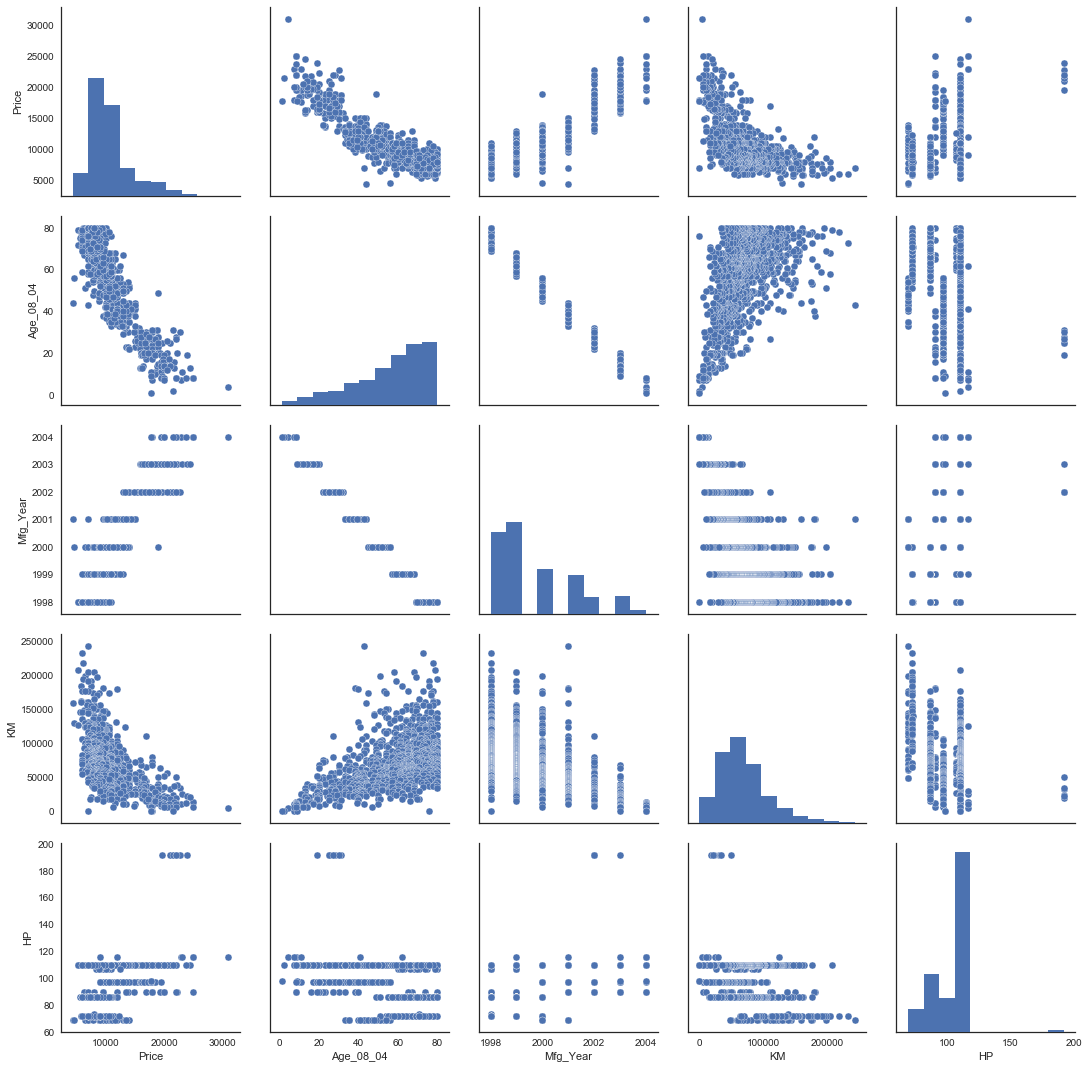

In [20]:
# PairPlot

with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([dfy.Price, dfX[cols_real[:4]]], axis=1) ,size=3)

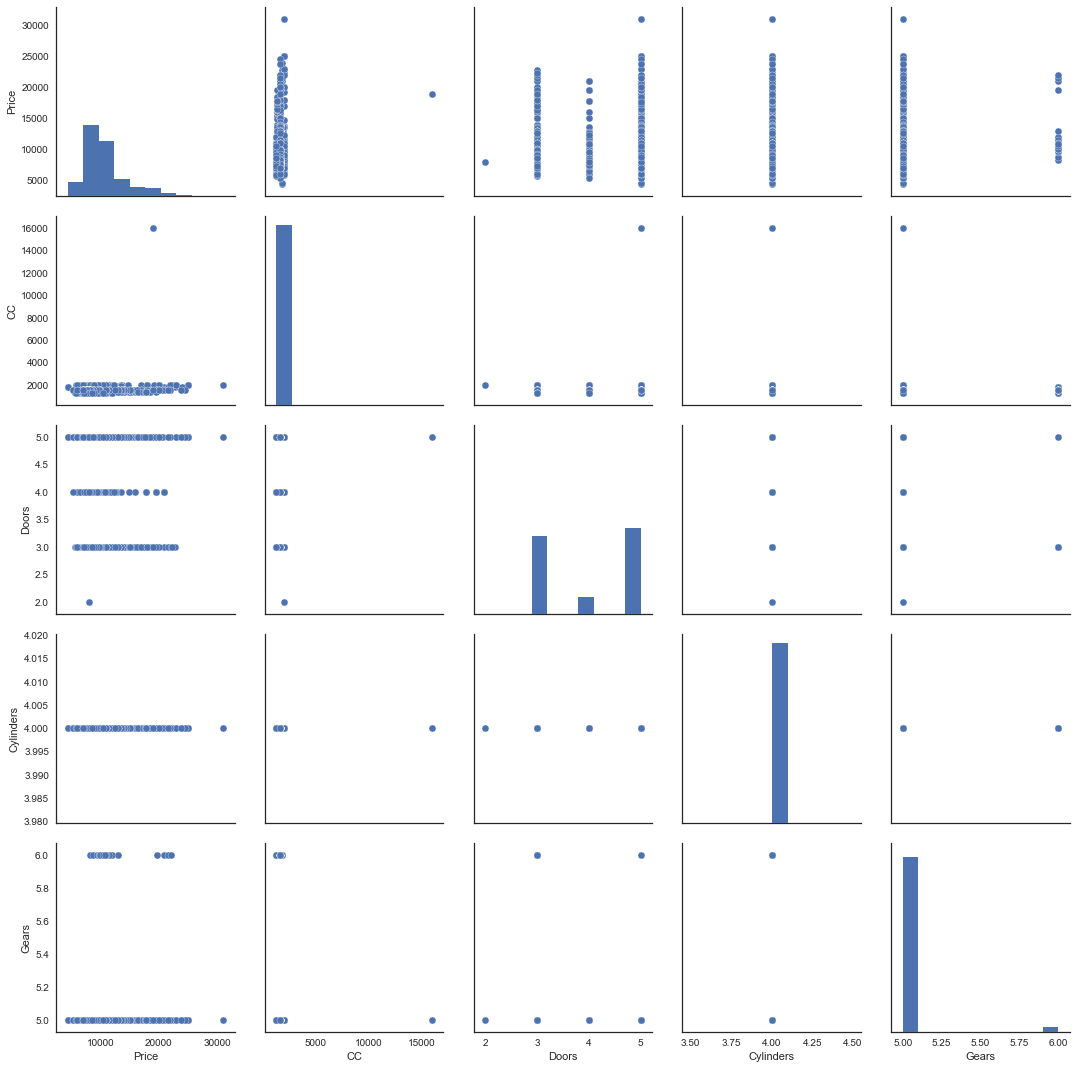

In [21]:
with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([dfy.Price, dfX[cols_real[4:8]]], axis=1) ,size=3)


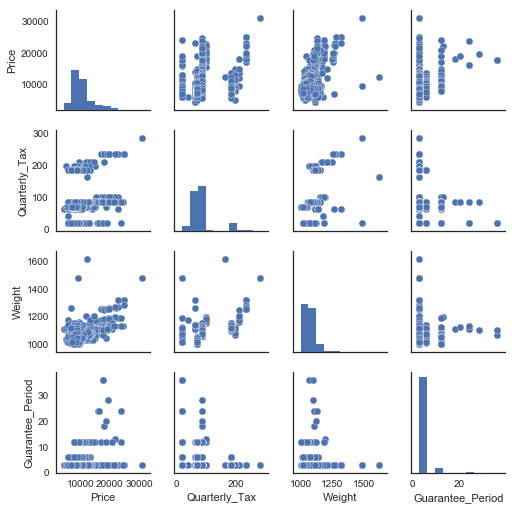

In [22]:
with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([dfy.Price, dfX[cols_real[8:]]], axis=1) ,size=1.8)

In [23]:
# 'CC', 'Doors', 'Cylinders', 'Gears' 를 포함한 29개 변수
cols_cat = ['CC', 'Doors', 'Cylinders', 'Gears', 'Mfg_Month', 'Fuel_Type', 'Met_Color', 
            'Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 
            'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 
            'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']
len(cols_cat)

29

In [24]:
def display_boxplot(feature):
    with plt.style.context(('seaborn-white')):
        sns.boxplot(x=dfX[feature], y=dfy['Price'], linewidth=2, palette="Set1")

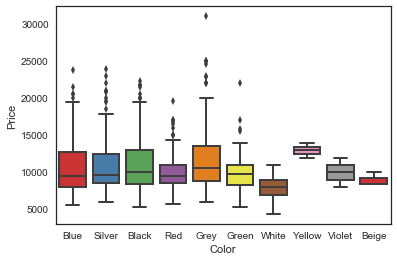

In [25]:

display_boxplot('Color')

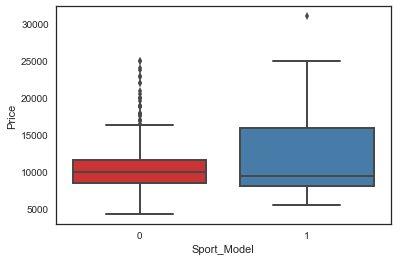

In [26]:
display_boxplot('Sport_Model')

In [27]:
def display_multi_boxplots(start_feature_name, row, col):
    with plt.style.context(('seaborn-white')):
        f, axes = plt.subplots(row, col, figsize=(2.3*col, 3.5*row), sharey=True)

        nums = row*col
        start_idx = cols_cat.index(start_feature_name)

        for num, ax in zip(range(nums), axes.flat):
            try:
                sns.boxplot(x=dfX[cols_cat[start_idx + num]], y=dfy['Price'], palette="Set3", ax=ax)
            except:
                pass

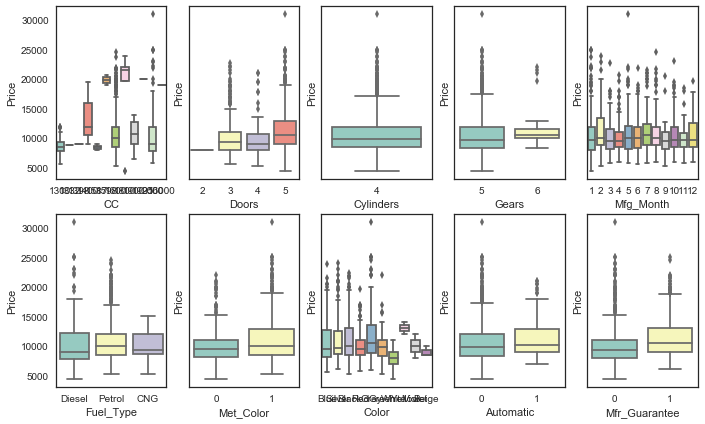

In [28]:
display_multi_boxplots('CC', 2, 5)


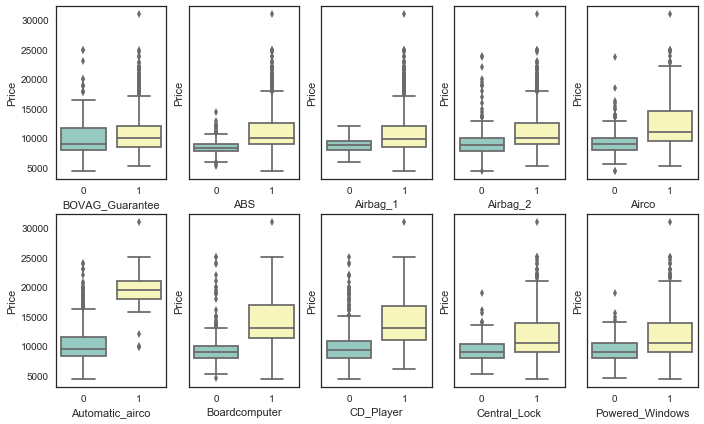

In [29]:
display_multi_boxplots('BOVAG_Guarantee', 2, 5)


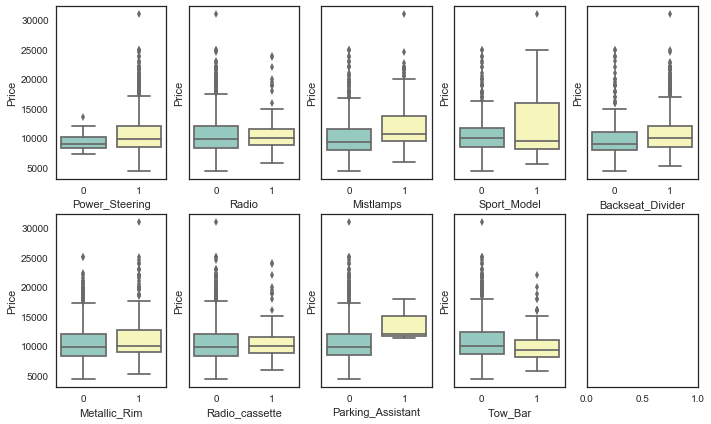

In [30]:
display_multi_boxplots('Power_Steering', 2, 5)


##### EDA 결과

숫자 데이터 중 price에 영향을 주는 feature
Age_08_04 / KM / Weight

범주형 데이터 중 price에 영향을 주는 feature

Airco / Auto-Airco / CD_Player / Central_Lock

1 - CC / Airco / Automatic_Airco / Boardcomputer / CD_Player

2 - Central_Lock / Powered_Windows / Mistlamps / Sport_Model